In [2]:
import matplotlib.pyplot as plt;
import numpy as np;

In [152]:
def polyApprox(x, y, degree):
    m = len(x);
    sx = np.zeros(2*degree+1);
    sy = np.zeros(degree+1);
    for i in range(degree*2+1):    
        sx[i] = np.sum(x**i)
        if i <= degree:
            sy[i] = np.sum(y*x**i);
    
    a = np.zeros((degree+1, degree+1));
    for i in range(degree+1):
        idx = i;
        for j in range(degree+1):
            a[i][j] = sx[idx];
            idx += 1;
    b = sy;
    print("A:",a)
    print("b:",b);
    
    x = np.linalg.solve(a, b);
    print("x:",x)
    return x;

def getError(x,y,a):
    if len(a)==2: 
        y1 = lambda x : a[0]+a[1]*x
        return np.sum(((y-y1(x))**2))
    elif len(a)==3: 
        y2 = lambda x : a[0]+a[1]*x+a[2]*x**2
        return np.sum(((y-y2(x))**2))
    elif len(a)==4: 
        y3 = lambda x : a[0]+a[1]*x+a[2]*x**2+a[3]*x**3
        return np.sum(((y-y3(x))**2))
    

def showGraph(x, y, a):
    plt.plot(x,y,'bo');
    x0= np.arange(np.min(x), np.max(x)+0.1,0.01);
    
    if len(a)==2: 
        y1 = lambda x : a[0]+a[1]*x
        plt.plot(x0, y1(x0),'r');
    elif len(a)==3: 
        y2 = lambda x : a[0]+a[1]*x+a[2]*x**2
        plt.plot(x0, y2(x0),'r');
    elif len(a)==4: 
        y3 = lambda x : a[0]+a[1]*x+a[2]*x**2+a[3]*x**3
        plt.plot(x0, y3(x0),'r');
        
    plt.show();
        
def approx(degree, xi, yi):
    for i in range(1, degree+1):
        print(f"{i}th polynomial approx")
        a = polyApprox(xi, yi, i);
        ae = getError(xi,yi,a);
        print("Error: ", ae)
        showGraph(xi,yi,a);

In [128]:
def logarithmApprox(x,y,xl=0):
    m = len(x);
    ny = np.log(y);
    nx = np.log(x) if xl else x;
    sx = np.zeros(3);
    sy = np.zeros(2);
    for i in range(3):    
        sx[i] = np.sum(nx**i)
        if i <= 1:
            sy[i] = np.sum(ny*nx**i);
    
    a = np.zeros((2, 2));
    for i in range(2):
        idx = i;
        for j in range(2):
            a[i][j] = sx[idx];
            idx += 1;
    b = sy;
    print("A:",a)
    print("b:",b);
    
    cx = np.linalg.solve(a, b);
    print("x:",cx)
    
    cx[0], cx[1] = np.exp(cx[0]), cx[1]
    y1 = lambda x : cx[0]*np.exp(cx[1]*x);
    y2 = lambda x : cx[0]*x**cx[1];
    error = np.sum(((y-y2(x))**2)) if xl else np.sum(((y-y1(x))**2))
    print("Error: ", error);
    
    plt.plot(x,y,'bo');
    x0= np.arange(x[0], x[-1]+0.1,0.01);
    if xl:
        plt.plot(x0, y2(x0),'r')
    else:
        plt.plot(x0, y1(x0),'r');
    plt.show()
    
    return x;

1th polynomial approx
A: [[ 6.    8.9 ]
 [ 8.9  14.17]]
b: [14.58  22.808]
x: [0.62089501 1.21962134]
Error:  2.7194492254734168e-05


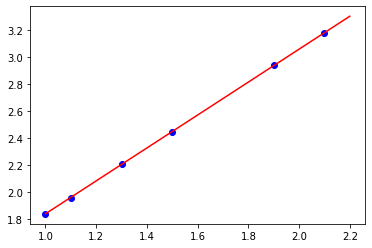

2th polynomial approx
A: [[ 6.      8.9    14.17  ]
 [ 8.9    14.17   24.023 ]
 [14.17   24.023  42.8629]]
b: [14.58   22.808  38.0962]
x: [ 0.59658071  1.25329314 -0.01085343]
Error:  1.801484230055818e-05


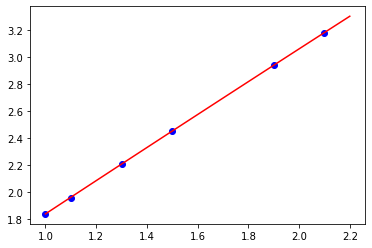

3th polynomial approx
A: [[  6.         8.9       14.17      24.023   ]
 [  8.9       14.17      24.023     42.8629  ]
 [ 14.17      24.023     42.8629    79.51919 ]
 [ 24.023     42.8629    79.51919  151.800997]]
b: [14.58    22.808   38.0962  67.18832]
x: [ 0.62901928  1.1850098   0.03533252 -0.01004723]
Error:  1.74073109522237e-05


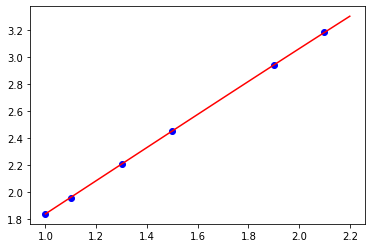

In [102]:
xi = np.array([1.0, 1.1, 1.3, 1.5, 1.9, 2.1])
yi = np.array([1.84, 1.96, 2.21, 2.45, 2.94, 3.18])

approx(3,xi,yi)

1th polynomial approx
A: [[6.     2.31  ]
 [2.31   1.2911]]
b: [6.797   2.82901]
x: [0.92951404 0.52810205]
Error:  0.0245660611491392


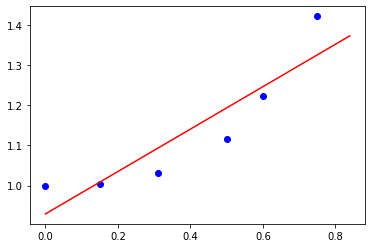

2th polynomial approx
A: [[6.         2.31       1.2911    ]
 [2.31       1.2911     0.796041  ]
 [1.2911     0.796041   0.51824771]]
b: [6.797     2.82901   1.6410741]
x: [ 1.01134099 -0.32569875  1.14733031]
Error:  0.0009452462934898267


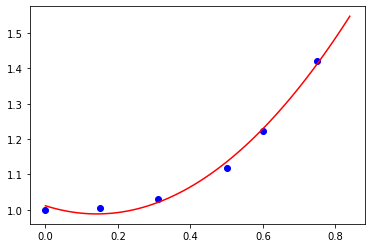

3th polynomial approx
A: [[6.         2.31       1.2911     0.796041  ]
 [2.31       1.2911     0.796041   0.51824771]
 [1.2911     0.796041   0.51824771 0.34925354]
 [0.796041   0.51824771 0.34925354 0.24115841]]
b: [6.797      2.82901    1.6410741  1.03780227]
x: [ 1.00043981 -0.00154099 -0.01150567  1.02102256]
Error:  0.00011123767823021737


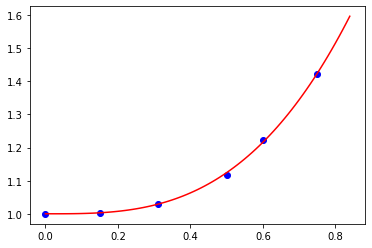

In [103]:
xi = np.array([0, 0.15, 0.31, 0.5, 0.6, 0.75])
yi = np.array([1.0, 1.004, 1.031, 1.117, 1.223, 1.422])

approx(3,xi,yi)

1th polynomial approx
A: [[ 10.    54.1 ]
 [ 54.1  303.39]]
b: [ 1958.39  11366.843]
x: [-194.13824073   72.0845177 ]
Error:  329.0131930338964


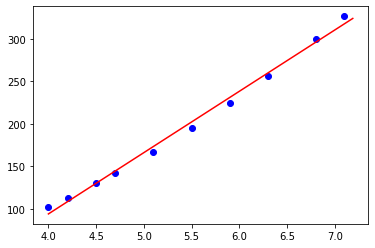

2th polynomial approx
A: [[1.00000000e+01 5.41000000e+01 3.03390000e+02]
 [5.41000000e+01 3.03390000e+02 1.75983100e+03]
 [3.03390000e+02 1.75983100e+03 1.05231207e+04]]
b: [ 1958.39   11366.843  68006.6811]
x: [ 1.23556037 -1.14352337  6.61821092]
Error:  0.0014429128859303122


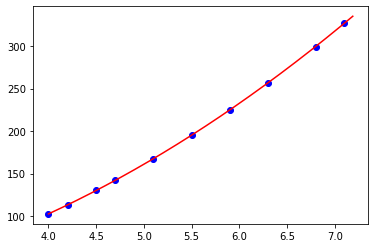

3th polynomial approx
A: [[1.00000000e+01 5.41000000e+01 3.03390000e+02 1.75983100e+03]
 [5.41000000e+01 3.03390000e+02 1.75983100e+03 1.05231207e+04]
 [3.03390000e+02 1.75983100e+03 1.05231207e+04 6.46079775e+04]
 [1.75983100e+03 1.05231207e+04 6.46079775e+04 4.05616744e+05]]
b: [  1958.39     11366.843    68006.6811  417730.09823]
x: [ 3.42909438 -2.37922111  6.84557777 -0.01367456]
Error:  0.0005273412030571169


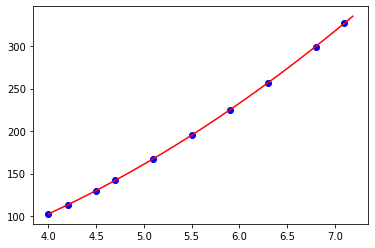

In [104]:
xi = np.array([4.0, 4.2, 4.5, 4.7, 5.1, 5.5, 5.9, 6.3, 6.8, 7.1])
yi = np.array([102.56, 113.18, 130.11, 142.05, 167.53, 195.14, 224.87, 256.73, 299.50, 326.72])

approx(3,xi,yi)

be^ax logarithm
A: [[ 10.    54.1 ]
 [ 54.1  303.39]]
b: [ 52.03363187 285.4897848 ]
x: [3.1887778  0.37238177]
Error:  417.69099537759257


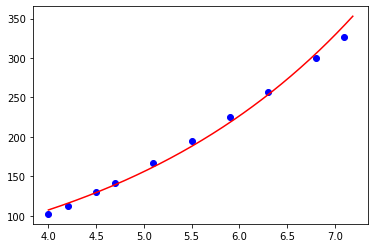

bx^a logarithm
A: [[10.         16.6995268 ]
 [16.6995268  28.25371164]]
b: [52.03363187 87.63344505]
x: [1.83082464 2.01954138]
Error:  0.007023205195694701


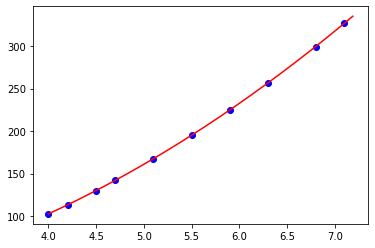

In [130]:
print("be^ax logarithm")
logarithmApprox(xi,yi);
print("bx^a logarithm")
logarithmApprox(xi,yi,1);

1th polynomial approx
A: [[   20.   546.]
 [  546. 15034.]]
b: [  64.8  1781.97]
x: [0.48657566 0.10085803]
Error:  5.048705616224648


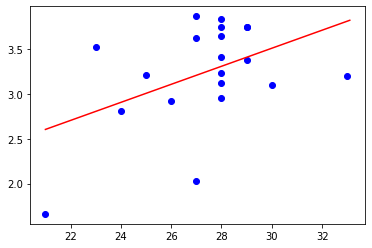

In [153]:
ACT = np.array([28, 25, 28, 27, 28, 33, 28, 29, 23, 27, 29, 28, 27, 29, 21, 28, 28, 26, 30, 24]);
GPA = np.array([3.84, 3.21, 3.23, 3.63, 3.75, 3.20, 3.41, 3.38, 3.53, 2.03, 3.75, 3.65, 3.87, 3.75, 1.66, 3.12, 2.96, 2.92, 3.10, 2.81]);

approx(1,ACT, GPA)

1th polynomial approx
A: [[17.        1.456   ]
 [ 1.456     0.139794]]
b: [443.      37.9658]
x: [25.92175459  1.60039289]
Error:  19.58252227531745


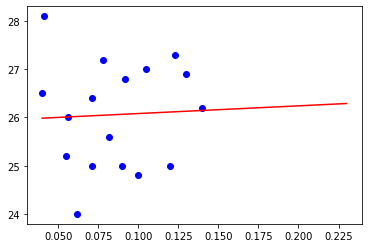

In [155]:
Thick = np.array([0.040,0.041,0.055,0.056,0.062,0.071,0.071,0.078,0.082,0.090,0.092,0.100,0.105,0.120,0.123,0.130,0.140]);
Atten = np.array([26.5,28.1,25.2,26.0,24.0,25.0,26.4,27.2,25.6,25.0,26.8,24.8,27.0,25.0,27.3,26.9,26.2]);

approx(1,Thick, Atten)